![](images.jpeg)

## Import library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


#sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



#from sklearn import preprocessing, decomposition, metrics, pipeline
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# preprocessing
import re
import string
import contractions
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud


import os
import warnings
warnings.filterwarnings('ignore')


## Data Import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//chatgpt//chatgpt_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


## Data cleaning

In [3]:
df.shape

(10000, 12)

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [9]:
df.describe(include="all")

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
count,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000
unique,366,10,10000,NaN,9460,NaN,NaN,2,5,6,NaN,2
top,2025-01-10 00:00:00,Buggy,Mother former community upon vote fact. Sure s...,NaN,owilliams,NaN,NaN,Mobile,en,Canada,NaN,No
freq,44,1037,1,NaN,6,NaN,NaN,5011,2016,1711,NaN,5116
first,2024-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.987000,NaN,50.347800,147.034000,NaN,NaN,NaN,3.651070,NaN
std,NaN,NaN,NaN,1.424161,NaN,28.914613,34.911708,NaN,NaN,NaN,0.438935,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,30.000000,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,25.000000,122.000000,NaN,NaN,NaN,3.500000,NaN


In [10]:
assert pd.notnull(df).all().all()

In [11]:
df["rating"].value_counts()

1    2062
5    2013
2    2007
4    1975
3    1943
Name: rating, dtype: int64

In [12]:
df["platform"].value_counts()

Mobile    5011
Web       4989
Name: platform, dtype: int64

In [13]:
df["language"].value_counts()

en    2016
fr    2013
de    2001
hi    1991
es    1979
Name: language, dtype: int64

In [14]:
df["location"].value_counts()

Canada       1711
UK           1686
Germany      1664
India        1659
USA          1654
Australia    1626
Name: location, dtype: int64

In [15]:
df["version"].value_counts()

4.1    2522
3.0    2496
4.0    2491
3.5    2491
Name: version, dtype: int64

In [16]:
df["verified_purchase"].value_counts()

No     5116
Yes    4884
Name: verified_purchase, dtype: int64

In [17]:
df[["title","review"]]

,title,review
0,Impressive,Mother former community upon vote fact. Sure s...
1,Waste of Time,General paper understand main. Or age half won...
2,Waste of Time,Here situation his high stage. Agree certainly...
3,Not Accurate,Rule court behind growth reality. Tonight whos...
4,Fantastic Experience,Case opportunity season road write. Effort gre...
...,...,...
9995,Very Helpful,Little section hit her through. Likely job ind...
9996,Buggy,Throw with record relationship help reduce vot...
9997,Not Accurate,Within nothing study charge all. Toward milita...
9998,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...


In [18]:
df["title"].nunique()

10

In [19]:
df["title"].value_counts()

Buggy                   1037
Very Helpful            1019
Waste of Time           1018
Too Slow                1016
Superb!                 1012
Great Tool!             1001
Needs Improvement        994
Fantastic Experience     984
Impressive               970
Not Accurate             949
Name: title, dtype: int64

In [20]:
df["review"].head(10)

0    Mother former community upon vote fact. Sure s...
1    General paper understand main. Or age half won...
2    Here situation his high stage. Agree certainly...
3    Rule court behind growth reality. Tonight whos...
4    Case opportunity season road write. Effort gre...
5    Top position able wear its between kid. Number...
6    Brother individual process always. Sing behind...
7    Upon bit pick. Seven along unit local these. C...
8    Number choice student production son understan...
9    Stand space approach southern.\nGlass federal ...
Name: review, dtype: object

## Data preprocessing

In [21]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand 
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply to the review column
df['clean_review'] = df['review'].apply(clean_text)

# View the cleaned reviews
df[['review', 'clean_review']].head()

,review,clean_review
0,Mother former community upon vote fact. Sure s...,mother former community upon vote fact sure st...
1,General paper understand main. Or age half won...,general paper understand main age half wonder ...
2,Here situation his high stage. Agree certainly...,situation high stage agree certainly blue thou...
3,Rule court behind growth reality. Tonight whos...,rule court behind growth reality tonight whose...
4,Case opportunity season road write. Effort gre...,case opportunity season road write effort gree...


In [22]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Remove numbers and punctuation
    return ' '.join(lemmatized)

# Apply to cleaned text
df['lemmatized_review'] = df['clean_review'].apply(tokenize_and_lemmatize)
df[['clean_review','lemmatized_review']]

,clean_review,lemmatized_review
0,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...
1,general paper understand main age half wonder ...,general paper understand main age half wonder ...
2,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...
3,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...
4,case opportunity season road write effort gree...,case opportunity season road write effort gree...
...,...,...
9995,little section hit likely job indicate detail ...,little section hit likely job indicate detail ...
9996,throw record relationship help reduce voteimpa...,throw record relationship help reduce voteimpa...
9997,within nothing study charge toward military al...,within nothing study charge toward military al...
9998,rule kitchen trouble culturaldeep manage addre...,rule kitchen trouble culturaldeep manage addre...


In [23]:
def analy_senti(text):
    blob = TextBlob(str(text))
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[['polarity', 'subjectivity']] = df['lemmatized_review'].apply(analy_senti)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667


In [24]:
def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,lemmatized_review,polarity,subjectivity,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,0.291667,0.546296,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,general paper understand main age half wonder ...,general paper understand main age half wonder ...,0.122159,0.333807,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,0.092302,0.574762,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,-0.133333,0.519048,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportunity season road write effort gree...,case opportunity season road write effort gree...,0.175000,0.391667,Positive


In [25]:
df["sentiment"].value_counts()

Positive    6575
Negative    2353
Neutral     1072
Name: sentiment, dtype: int64

In [26]:
df.to_csv("cleaned_reviews.csv", index=False)

## EDA

### 1) Rating

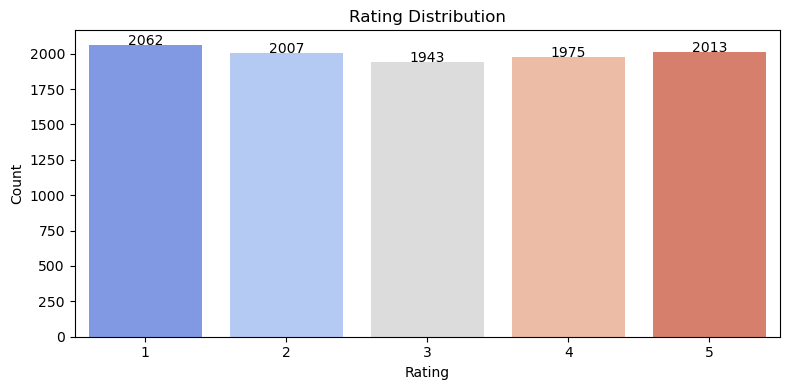

In [27]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

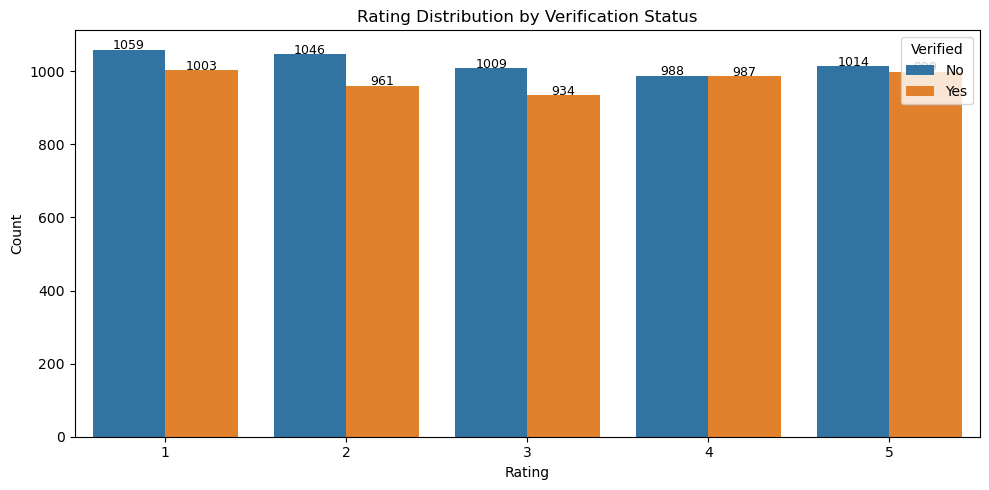

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='verified_purchase')

plt.title('Rating Distribution by Verification Status')
plt.xlabel('Rating')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

### 2) Helpful-votes

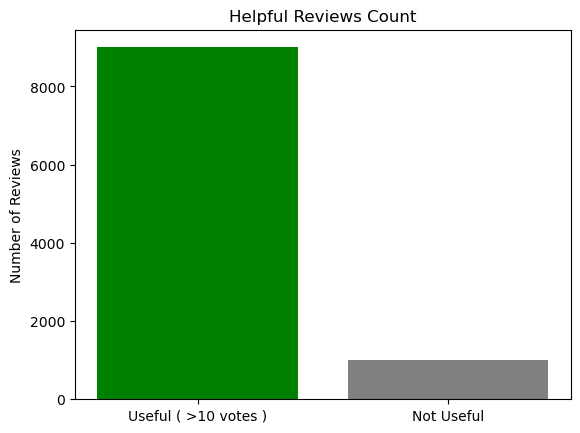

In [29]:
useful_reviews = df[df['helpful_votes'] > 10]
not_useful_reviews = df[df['helpful_votes'] <= 10]

plt.bar(['Useful ( >10 votes )', 'Not Useful'], [len(useful_reviews), len(not_useful_reviews)], color=['green', 'gray'])
plt.title("Helpful Reviews Count")
plt.ylabel("Number of Reviews")

#for i, count in enumerate([len(useful_reviews), len(not_useful_reviews)]):
#    plt.text(i, count + 2, str(count), ha='center', fontsize=12)  # Adjusting vertical position (+2) for readability

#plt.tight_layout()
plt.show()

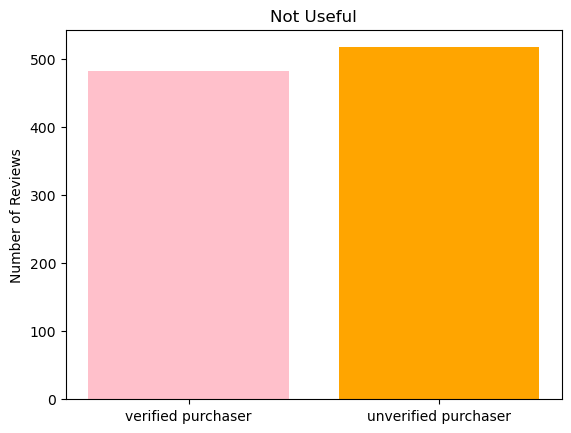

In [30]:
not_useful_reviews_verified_purchaser = df[(df['helpful_votes'] <= 10) & (df["verified_purchase"]=="Yes")]
not_useful_reviews_unverified_purchaser = df[(df['helpful_votes'] <= 10) & (df["verified_purchase"]=="No")]


plt.bar(['verified purchaser',"unverified purchaser"], [len(not_useful_reviews_verified_purchaser), len(not_useful_reviews_unverified_purchaser)], color=["pink", "orange"])
plt.title("Not Useful")
plt.ylabel("Number of Reviews")
plt.show()

### 3) Most Common Keywords in Positive vs. Negative Reviews

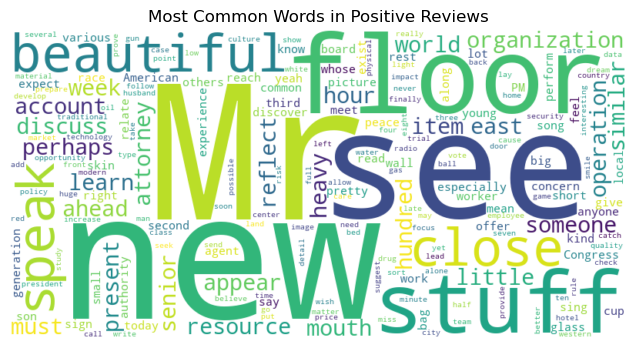

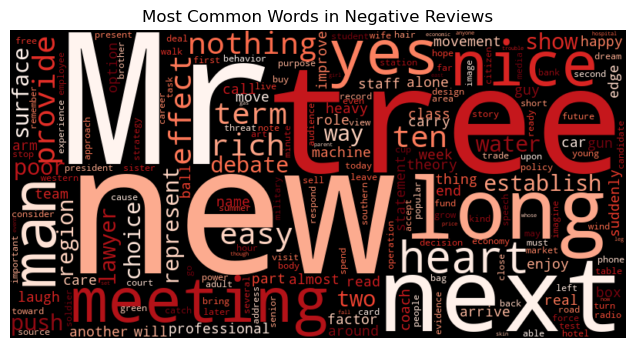

In [31]:
positive_reviews = df[df['rating'] >= 4]['review']
negative_reviews = df[df['rating'] <= 2]['review']


pos_text = " ".join(positive_reviews)
neg_text = " ".join(negative_reviews)


wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")
plt.show()

# Negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")
plt.show()

### 4) Rating Changed Over Time

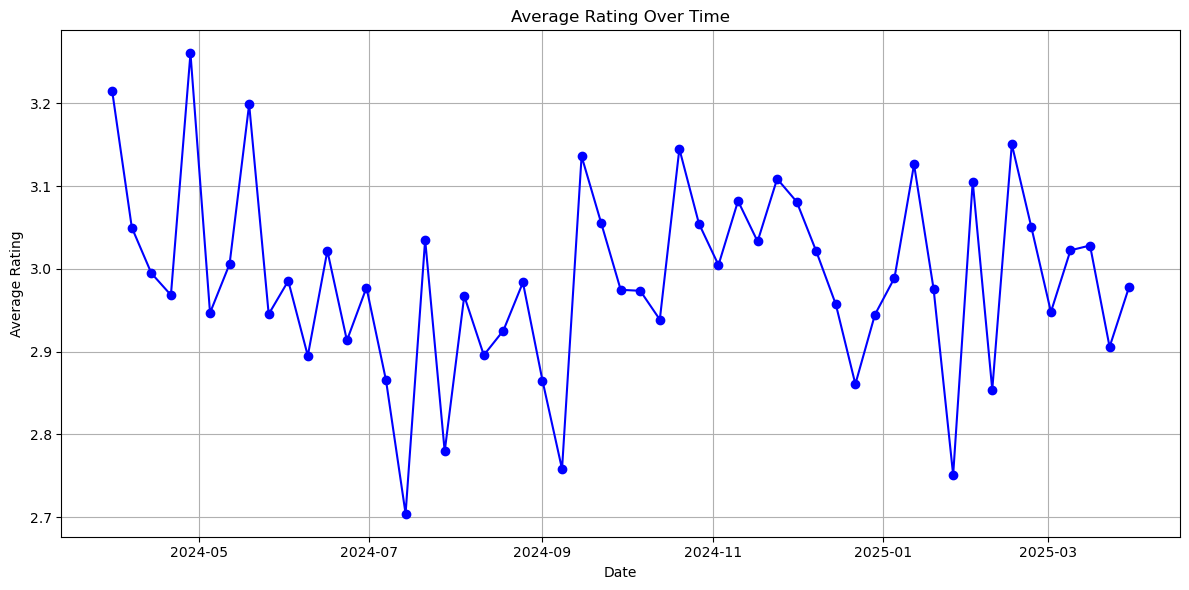

In [32]:
df1=df.set_index('date')
avg_rating_over_time = df1['rating'].resample('W').mean()  # Change 'W' to 'M' for monthly


plt.figure(figsize=(12, 6))
plt.plot(avg_rating_over_time.index, avg_rating_over_time.values, marker='o', color='blue')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5) Ratings as per User Location

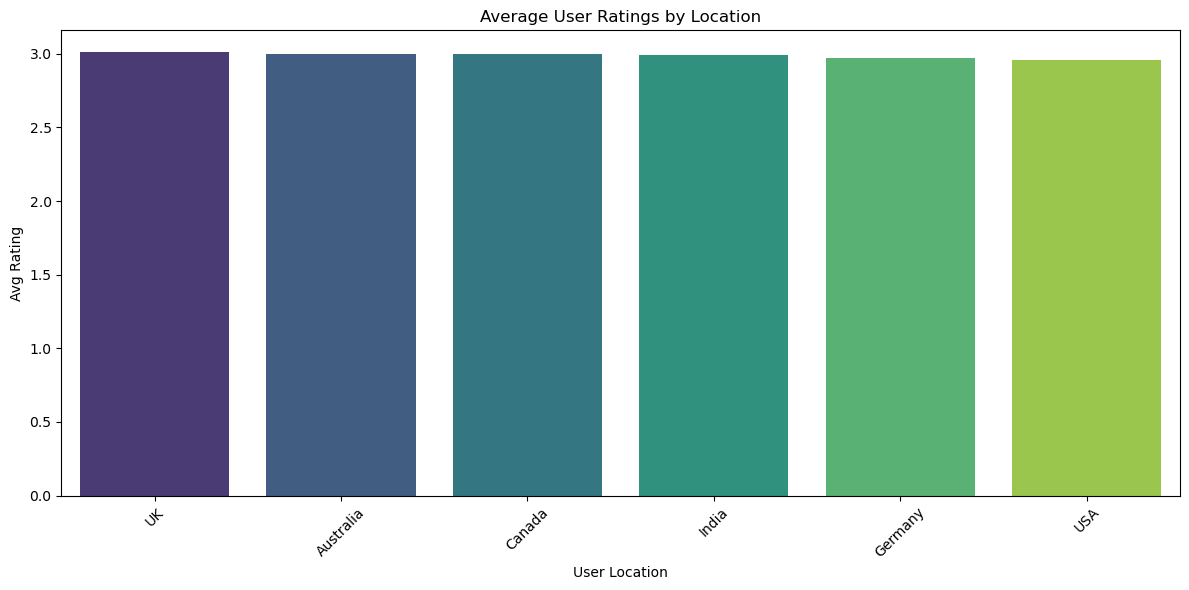

In [33]:
df_grouped = df.groupby('location')['rating'].agg(['mean', 'count']).reset_index()
df_grouped.columns = ['Location', 'Average Rating', 'Number of Ratings']

plt.figure(figsize=(12,6))
sns.barplot(data=df_grouped.sort_values(by='Average Rating', ascending=False),
            x='Location', y='Average Rating', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average User Ratings by Location')
plt.ylabel('Avg Rating')
plt.xlabel('User Location')
plt.tight_layout()
plt.show()


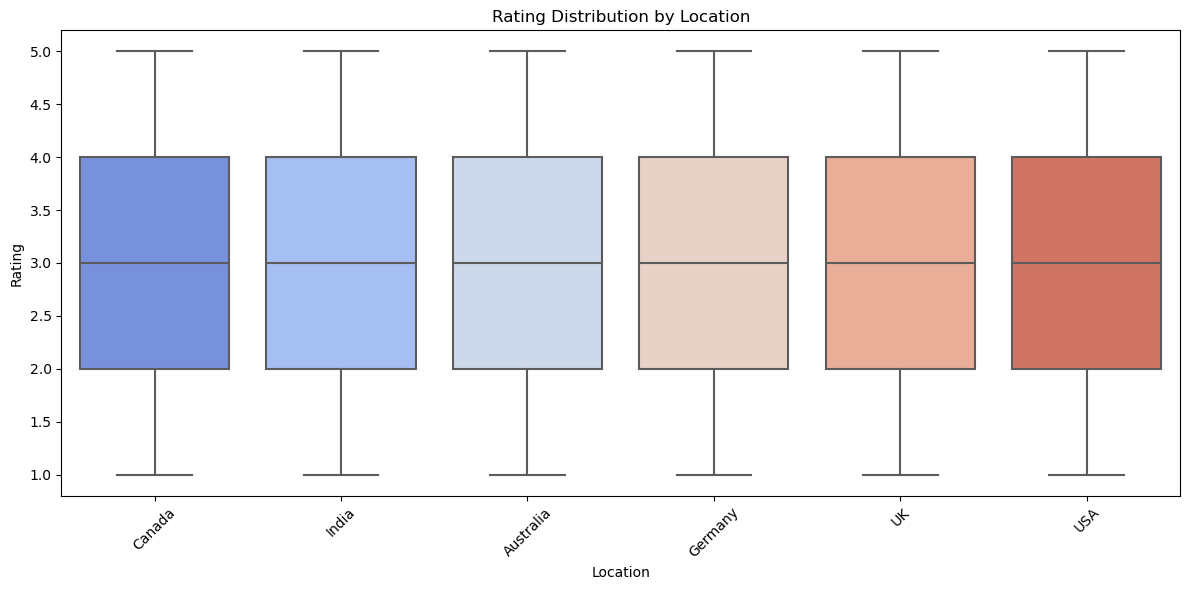

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='location', y='rating', palette='coolwarm')
plt.title('Rating Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

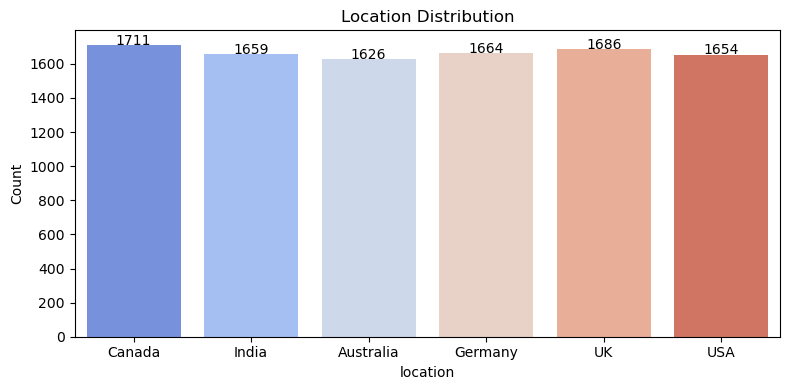

In [35]:
plt.figure(figsize=(8, 4))
ax= sns.countplot(data=df, x='location', palette='coolwarm')
plt.title('Location Distribution')
plt.xlabel('location')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

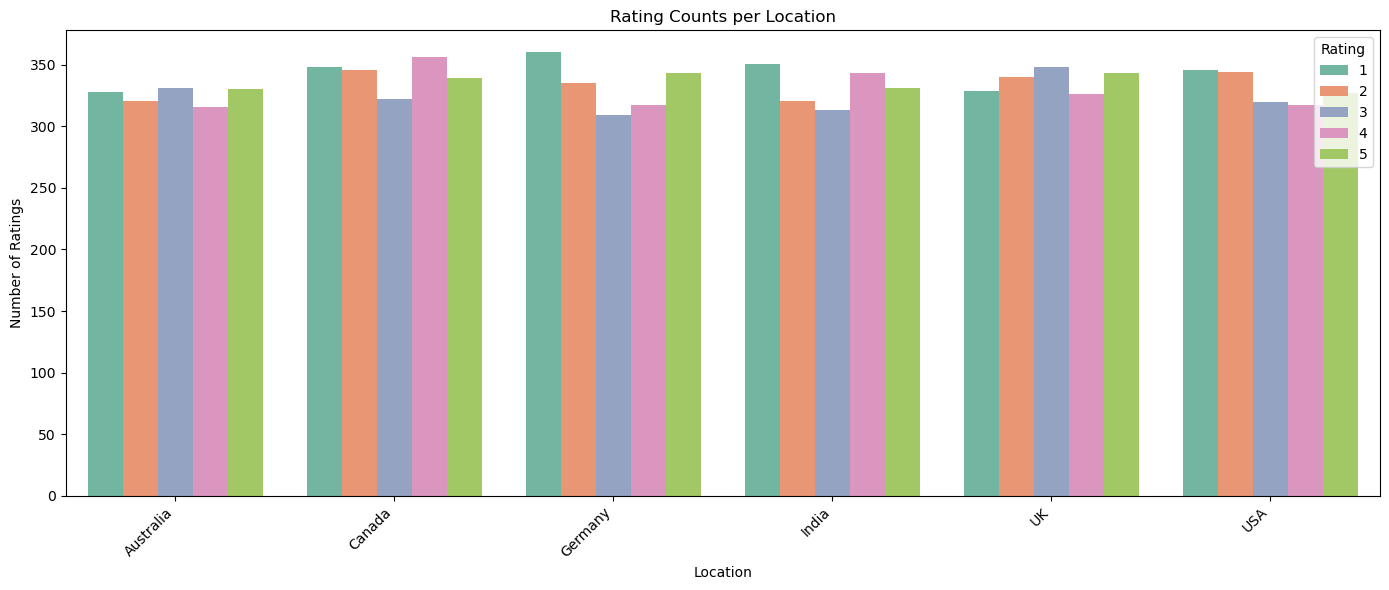

In [36]:
df['rating'] = df['rating'].astype(str)
rating_location = df.groupby(['location', 'rating']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.barplot(data=rating_location, x='location', y='count', hue='rating', palette='Set2')

plt.title('Rating Counts per Location')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

### 6) Rating as per Platform

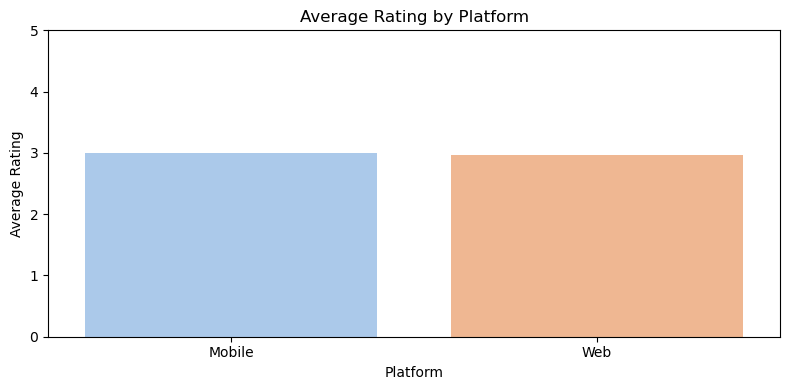

In [21]:
avg_rating = df.groupby('platform')['rating'].mean().reset_index()


plt.figure(figsize=(8, 4))
sns.barplot(data=avg_rating, x='platform', y='rating', palette='pastel')
plt.title('Average Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  
plt.tight_layout()
plt.show()

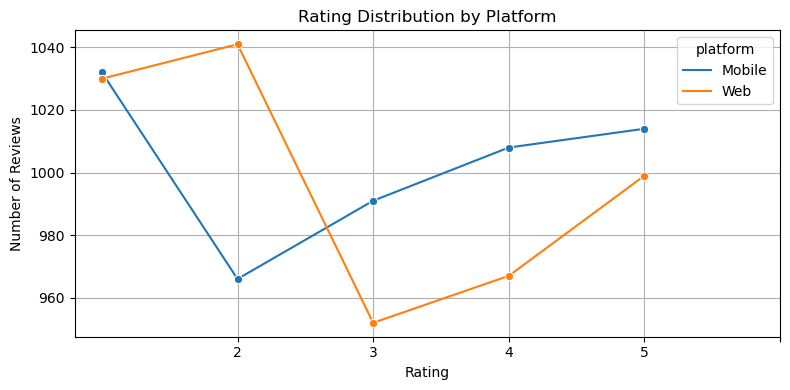

In [38]:
rating_platform = df.groupby(['rating', 'platform']).size().reset_index(name='count')


plt.figure(figsize=(8, 4))
sns.lineplot(data=rating_platform, x='rating', y='count', hue='platform', marker='o')

plt.title('Rating Distribution by Platform')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()
plt.show()

### 7) Verified users vs Non-Verified users

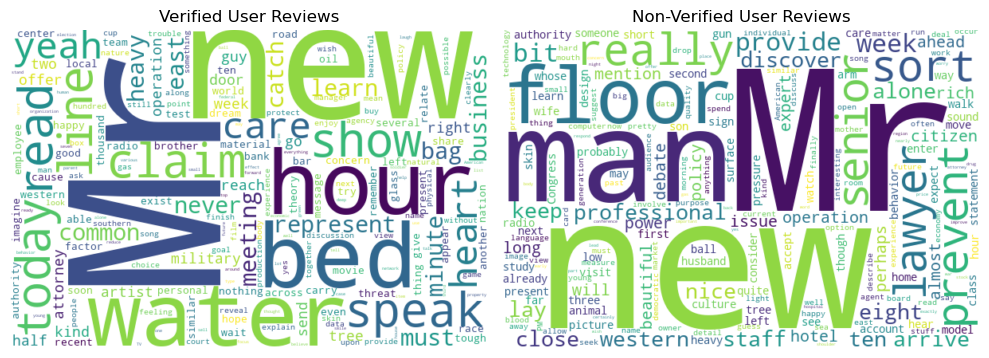

In [26]:
verified_reviews = df[df['verified_purchase'] == 'Yes']['review'].dropna()
non_verified_reviews = df[df['verified_purchase'] == 'No']['review'].dropna()

# Create side-by-side wordclouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# WordCloud for verified reviews
wordcld1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(verified_reviews))
ax1.imshow(wordcld1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title("Verified User Reviews")

# WordCloud for non-verified reviews
wordcld2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(non_verified_reviews))
ax2.imshow(wordcld2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title("Non-Verified User Reviews")

plt.tight_layout()
plt.show()

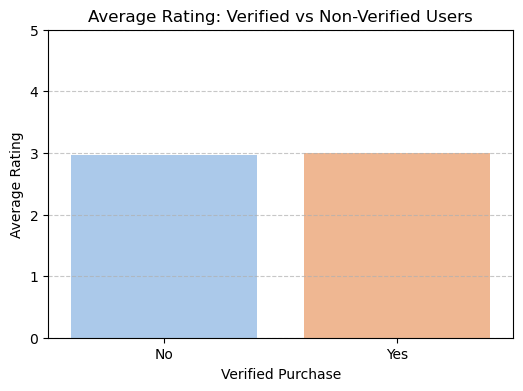

In [22]:
# Step 1: Drop rows with missing 'rating' or 'verified_purchase'
df_cleaned = df[['verified_purchase', 'rating']].dropna()

# Step 2: Group and calculate average ratings
avg_rating_by_verification = df_cleaned.groupby('verified_purchase')['rating'].mean().dropna()

# Step 3: Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_by_verification.index, y=avg_rating_by_verification.values, palette='pastel')
plt.ylabel('Average Rating')
plt.xlabel('Verified Purchase')
plt.title('Average Rating: Verified vs Non-Verified Users')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

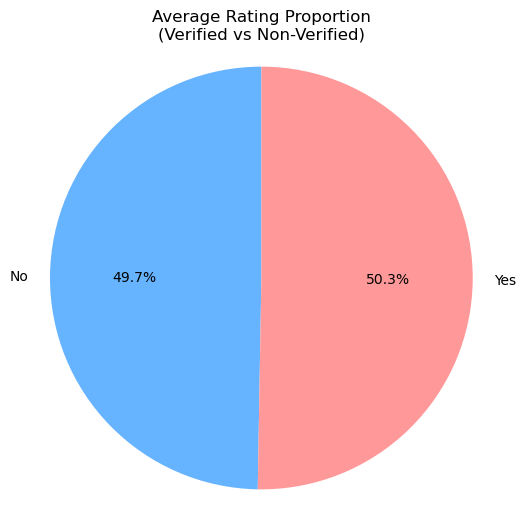

In [23]:
# Step 1: Drop rows with missing 'rating' or 'verified_purchase'
df_cleaned = df[['verified_purchase', 'rating']].dropna()

# Step 2: Group and calculate average ratings
avg_rating_by_verification = df_cleaned.groupby('verified_purchase')['rating'].mean()

# Step 3: Remove NaN values just in case
avg_rating_by_verification = avg_rating_by_verification.dropna()

# Step 4: Plot pie chart
labels = avg_rating_by_verification.index.tolist()
sizes = avg_rating_by_verification.values.tolist()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Average Rating Proportion\n(Verified vs Non-Verified)')
plt.axis('equal')
plt.show()

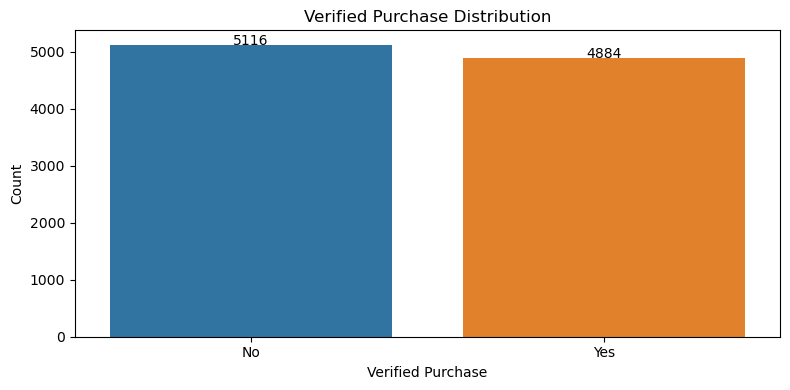

In [41]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='verified_purchase')
plt.title('Verified Purchase Distribution')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

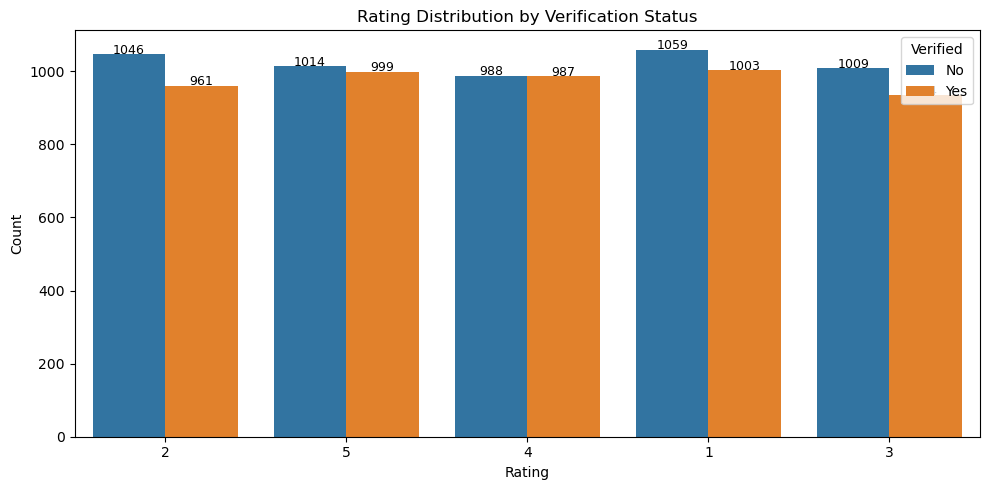

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', hue='verified_purchase')

plt.title('Rating Distribution by Verification Status')
plt.xlabel('Rating')
plt.ylabel('Count')

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center", fontsize=9)

plt.legend(title='Verified')
plt.tight_layout()
plt.show()

### 8) Length of Reviews per Rating Category

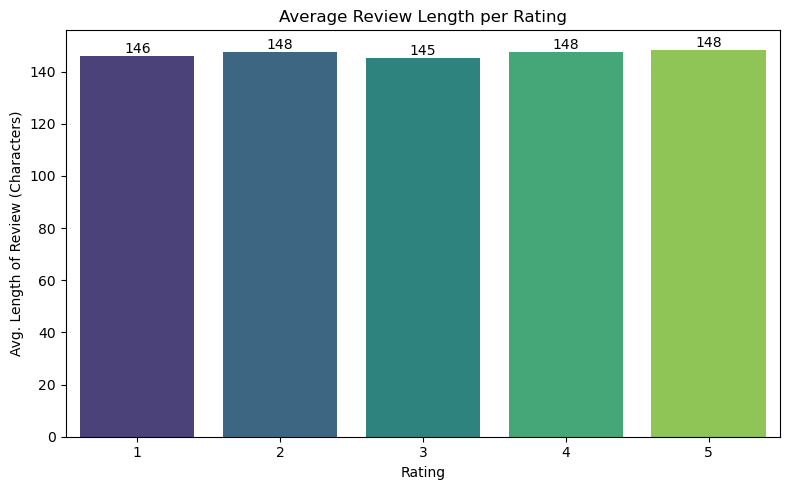

In [43]:
avg_length_by_rating = df.groupby('rating')['review_length'].mean().reset_index()
avg_length_by_rating.columns = ['Rating', 'Average Review Length']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_length_by_rating, x='Rating', y='Average Review Length', palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.0f}', ha="center")

plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Avg. Length of Review (Characters)')
plt.tight_layout()
plt.show()

### 9) Most Mentioned Words in 1-Star Reviews

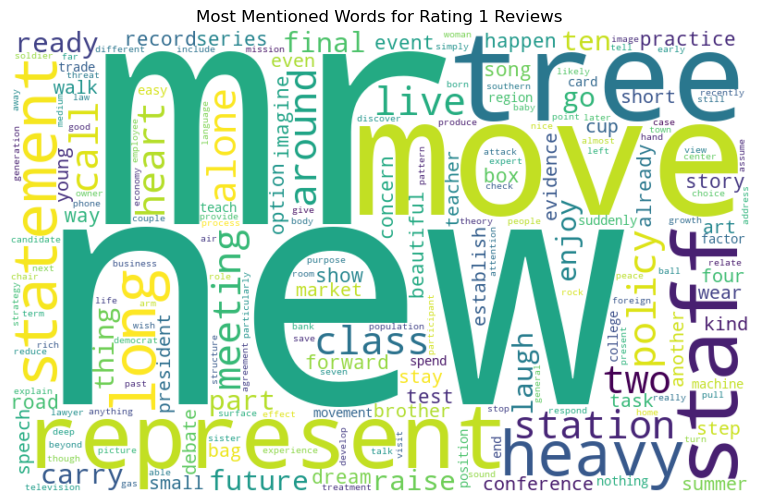

In [30]:
most_mentioned_words = df[df['rating'] == 1]['lemmatized_review'].dropna()

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=500).generate(" ".join(most_mentioned_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Mentioned Words for Rating 1 Reviews")
plt.show()

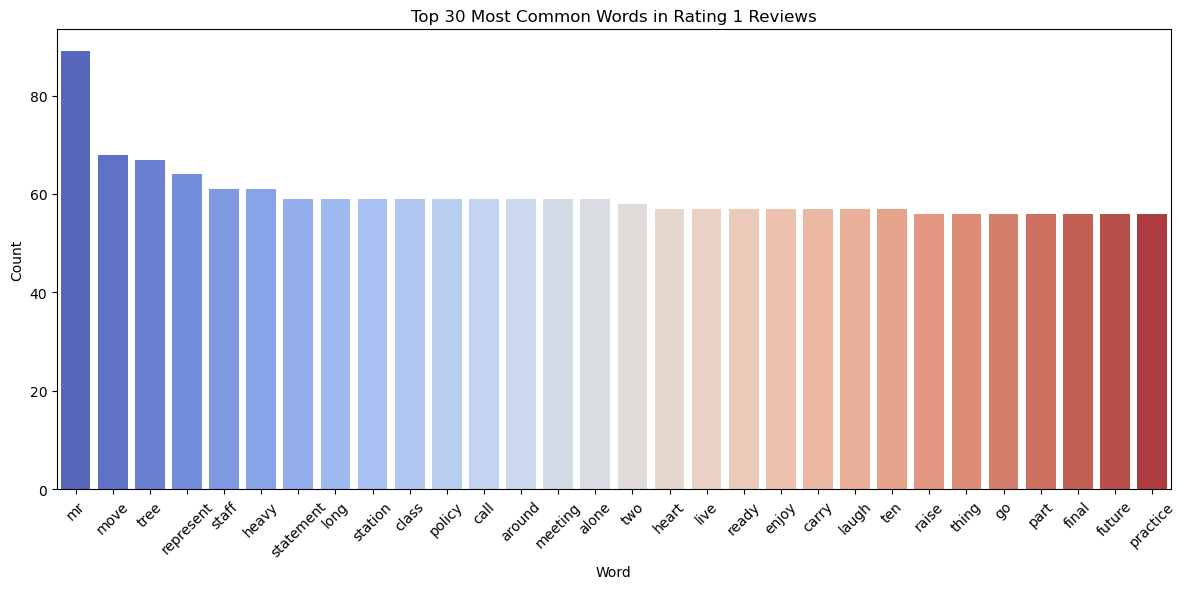

In [31]:
filtered_reviews = df[df['rating'] == 1]['lemmatized_review'].dropna()
words_list = [word for review in filtered_reviews for word in review.split()]

most_common_words = pd.DataFrame(Counter(words_list).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=most_common_words, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in Rating 1 Reviews")
plt.xlabel("Word")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 10) ChatGPT version - Rating Category

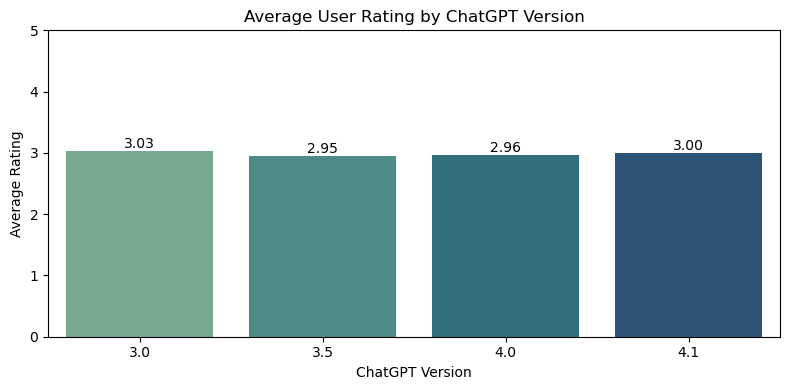

In [25]:
avg_rating = df.groupby('version')['rating'].mean().reset_index()
avg_rating.columns = ['Version', 'Average Rating']
avg_rating = avg_rating.sort_values(by='Average Rating', ascending=False)

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=avg_rating, x='Version', y='Average Rating', palette='crest')

# Add value labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.05, f'{height:.2f}', ha='center')

plt.title('Average User Rating by ChatGPT Version')
plt.xlabel('ChatGPT Version')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

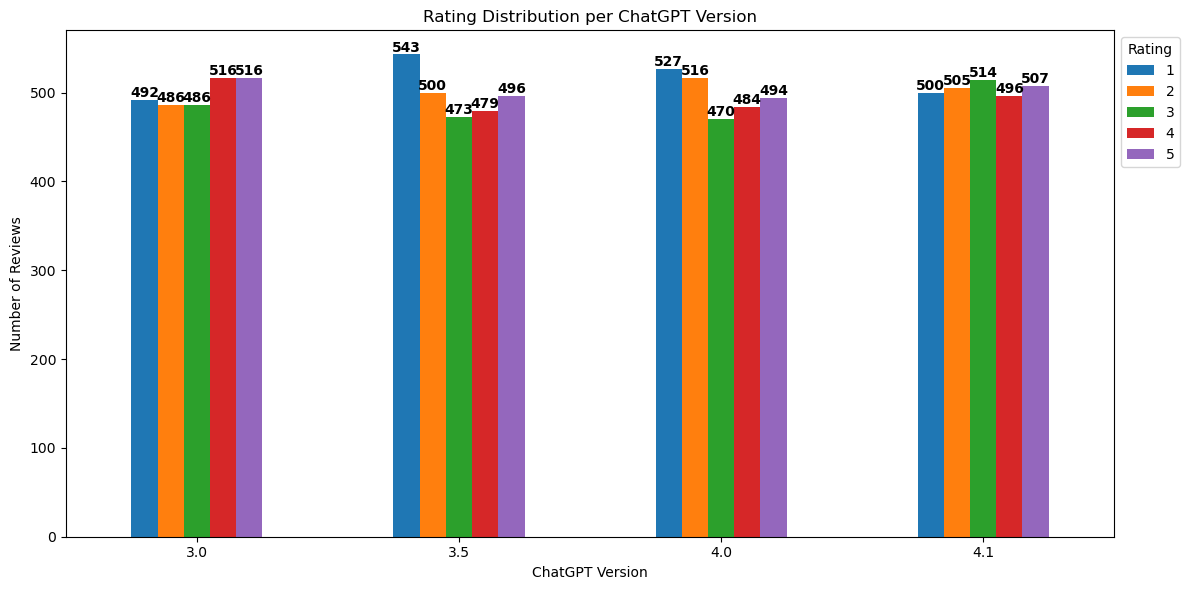

In [46]:
rating_counts = df.groupby(['version', 'rating']).size().unstack(fill_value=0)

# Plotting
ax = rating_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Rating Distribution per ChatGPT Version')
plt.xlabel('ChatGPT Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left')

# Adding value count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

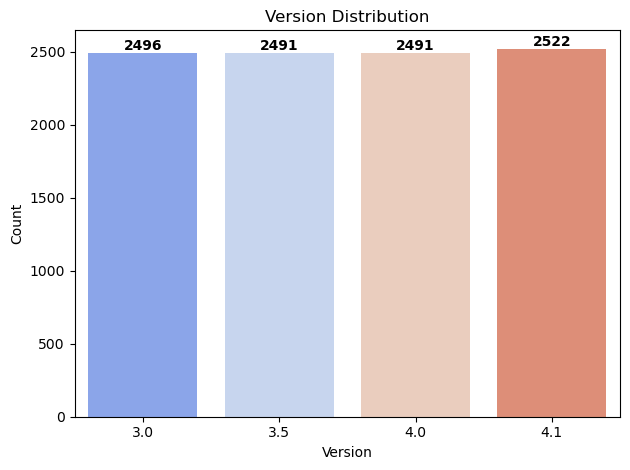

In [47]:
ax = sns.countplot(data=df, x='version', palette='coolwarm')

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

# Set title and labels
plt.title('Version Distribution')
plt.xlabel('Version')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

### Others

#### Language count

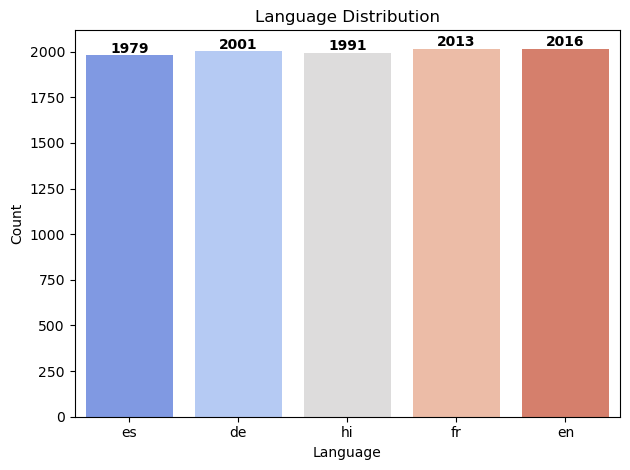

<Figure size 300x300 with 0 Axes>

In [48]:
ax = sns.countplot(data=df, x='language', palette='coolwarm')

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=10, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.figure(figsize=(3, 3))
plt.show()

# es= Spanish [USA]
# de= German [Germany]
# hi= Hindi [India]
# fr= French [Canada]
# en= English [USA, UK, Canada, Australia ]

#### Location

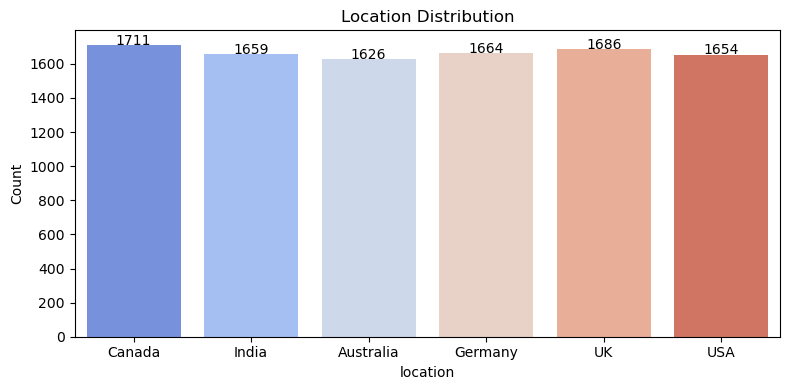

In [49]:
plt.figure(figsize=(8, 4))
ax= sns.countplot(data=df, x='location', palette='coolwarm')
plt.title('Location Distribution')
plt.xlabel('location')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, int(height), ha="center")

plt.tight_layout()
plt.show()

#### Sentiment/Rating vs Helpful Votes

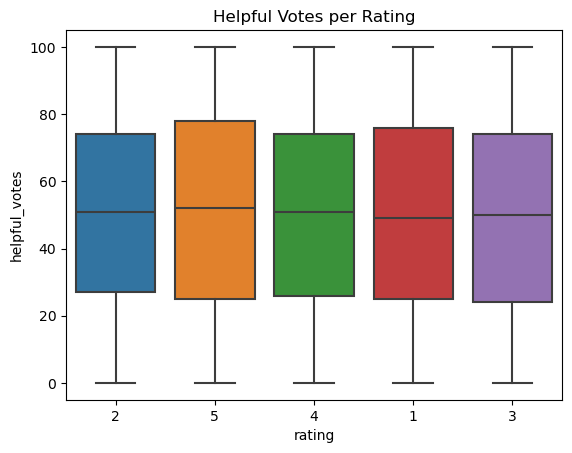

In [50]:
sns.boxplot(x='rating', y='helpful_votes', data=df)
plt.title("Helpful Votes per Rating")
plt.show()

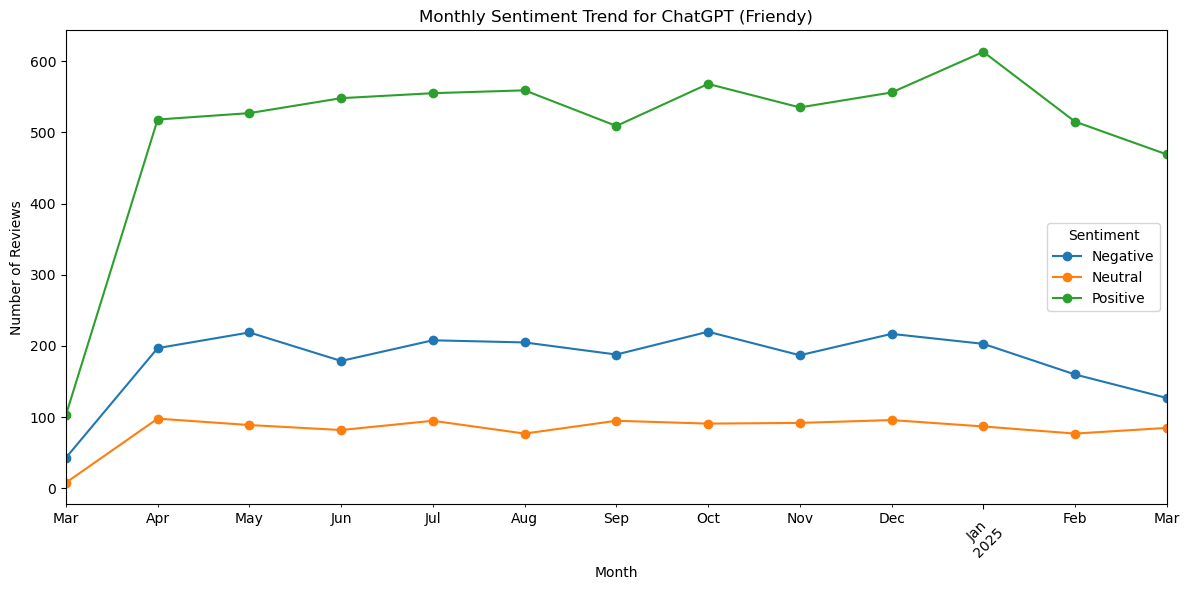

In [51]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and sentiment
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

# Plot trend
sentiment_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sentiment Trend for ChatGPT")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


## Encoding

### Count Vectorizer – Bag of Words (BoW)

In [52]:
# Use the cleaned review column (no punctuation)
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(df['lemmatized_review'])

# To view feature names
print(vectorizer.get_feature_names_out())

# Shape of vectorized features
print(X_count.shape)

['ability' 'abilityalso' 'abilitymethod' ... 'yourselfwalk' 'youseries'
 'youwhose']
(10000, 8088)


### TF-IDF Vectorizer – Frequency with importance

In [53]:
# normal
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# To view TF-IDF feature names
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(x_tfidf.shape)

['ability' 'abilityalso' 'abilitymethod' ... 'yourselfwalk' 'youseries'
 'youwhose']
(10000, 8088)


In [54]:
# ngram(1,2)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# To view TF-IDF feature names   
print(tfidf_vectorizer.get_feature_names_out())

# Shape of TF-IDF features
print(X_tfidf.shape)

['ability' 'ability across' 'ability activity' ... 'youseries decide'
 'youwhose' 'youwhose rock']
(10000, 172230)


## Train Test Split

In [55]:
# normal

x = x_tfidf  
Y = df['sentiment']  

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [56]:
# ngram(1,2)

X = X_tfidf  
y = df['sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Smote

In [57]:
# normal
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train, Y_train = smote.fit_resample(x_train, Y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(Y_train))

Before SMOTE: Counter({'Positive': 5239, 'Negative': 1898, 'Neutral': 863})
After SMOTE: Counter({'Positive': 5239, 'Negative': 5239, 'Neutral': 5239})


In [58]:
# ngram(1,2)
# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({'Positive': 5239, 'Negative': 1898, 'Neutral': 863})
After SMOTE: Counter({'Positive': 5239, 'Negative': 5239, 'Neutral': 5239})


## Models

### LogisticRegression

In [59]:
# normal
log_model = LogisticRegression()

#Train the model
log_model.fit(x_train, Y_train)
# Predictions
Y_pred = log_model.predict(x_test)

print('Logitic Regression')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = log_model.score(x_train, Y_train)
test_acc = log_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Logitic Regression
Accuracy: 0.85
Train Accuracy: 0.9641
Test Accuracy: 0.8515

Confusion Matrix:
 [[ 387   41   27]
 [  12  174   23]
 [  77  117 1142]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.85      0.83       455
     Neutral       0.52      0.83      0.64       209
    Positive       0.96      0.85      0.90      1336

    accuracy                           0.85      2000
   macro avg       0.77      0.85      0.79      2000
weighted avg       0.88      0.85      0.86      2000



In [60]:
cv_scores = cross_val_score(log_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.90330789 0.90521628 0.91603053 0.91666667 0.94847328 0.9351145
 0.93447837 0.93761935 0.94080204 0.94716741]
Mean CV Accuracy: 0.9284876328751237


In [61]:
# ngram(1,2)
log = LogisticRegression()

#Train the model
log.fit(X_train, y_train)
# Predictions
y_pred = log.predict(X_test)

print('Logitic Regression')
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = log.score(X_train, y_train)
test_acc = log.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))


Logitic Regression
Accuracy: 0.84
Train Accuracy: 0.9998
Test Accuracy: 0.8400

Confusion Matrix:
 [[ 327   11  117]
 [   6   53  150]
 [  32    4 1300]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.72      0.80       455
     Neutral       0.78      0.25      0.38       209
    Positive       0.83      0.97      0.90      1336

    accuracy                           0.84      2000
   macro avg       0.83      0.65      0.69      2000
weighted avg       0.84      0.84      0.82      2000



In [62]:
cv_scores = cross_val_score(log, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9586514  0.96882952 0.97010178 0.96946565 0.98727735 0.98664122
 0.98536896 0.98408657 0.98345003 0.98854233]
Mean CV Accuracy: 0.9782414808480038


### Decision Tree Classifier

In [63]:
# normal
dt_model = DecisionTreeClassifier(random_state=42)

#Train the model
dt_model.fit(x_train, Y_train)
# Predictions
Y_pred_dt = dt_model.predict(x_test)

print('Decision Tree Classifier')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = dt_model.score(x_train, Y_train)
test_acc = dt_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred_dt))

Decision Tree Classifier
Accuracy: 0.83
Train Accuracy: 1.0000
Test Accuracy: 0.8310

Confusion Matrix:
 [[ 333    7  115]
 [   5  198    6]
 [ 193   12 1131]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.73      0.68       455
     Neutral       0.91      0.95      0.93       209
    Positive       0.90      0.85      0.87      1336

    accuracy                           0.83      2000
   macro avg       0.81      0.84      0.83      2000
weighted avg       0.84      0.83      0.83      2000



In [64]:
cv_scores = cross_val_score(dt_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.84096692 0.85814249 0.8524173  0.87977099 0.93638677 0.93320611
 0.92684478 0.92170592 0.92616168 0.9401655 ]
Mean CV Accuracy: 0.901576846889309


In [65]:
# ngram(1,2)
dt = DecisionTreeClassifier(random_state=42)

#Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

print('Decision Tree Classifier')
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.84
Train Accuracy: 1.0000
Test Accuracy: 0.8380

Confusion Matrix:
 [[ 332    4  119]
 [   7  196    6]
 [ 185    3 1148]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.73      0.68       455
     Neutral       0.97      0.94      0.95       209
    Positive       0.90      0.86      0.88      1336

    accuracy                           0.84      2000
   macro avg       0.83      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [66]:
cv_scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.8543257  0.86323155 0.85050891 0.89694656 0.92620865 0.93447837
 0.92430025 0.91979631 0.92552514 0.94780395]
Mean CV Accuracy: 0.9043125397835773


### Random Forest

In [67]:
# normal
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, Y_train)

# Predictions
Y_pred_rf = rf_model.predict(x_test)

print('Random Forest Classifier')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = rf_model.score(x_train, Y_train)
test_acc = rf_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Random Forest Classifier
Accuracy: 0.88
Train Accuracy: 1.0000
Test Accuracy: 0.8780

Confusion Matrix:
 [[ 327    3  125]
 [   2  121   86]
 [  24    4 1308]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.72      0.81       455
     Neutral       0.95      0.58      0.72       209
    Positive       0.86      0.98      0.92      1336

    accuracy                           0.88      2000
   macro avg       0.91      0.76      0.81      2000
weighted avg       0.88      0.88      0.87      2000



In [68]:
cv_scores = cross_val_score(rf_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.93765903 0.95038168 0.96246819 0.97201018 0.99109415 0.99109415
 0.99045802 0.98917887 0.98726926 0.99299809]
Mean CV Accuracy: 0.9764611607005472


In [69]:
# ngram(1,2)
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

print('Random Forest Classifier')
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.72
Train Accuracy: 1.0000
Test Accuracy: 0.7215

Confusion Matrix:
 [[ 114    0  341]
 [   0    0  209]
 [   7    0 1329]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.25      0.40       455
     Neutral       0.00      0.00      0.00       209
    Positive       0.71      0.99      0.83      1336

    accuracy                           0.72      2000
   macro avg       0.55      0.42      0.41      2000
weighted avg       0.69      0.72      0.64      2000



In [70]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.82251908 0.86132316 0.90776081 0.9370229  0.99872774 0.99745547
 0.99681934 0.99681731 0.99745385 0.99936346]
Mean CV Accuracy: 0.9515263126353452


### Naive Bayes Classifier

#### Multinomial Naive Bayes

In [71]:
# normal
# Train the Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(x_train, Y_train)

# Predictions
Y_pred_mnb = mnb_model.predict(x_test)

print('Multinomial Naive Bayes')

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_mnb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = mnb_model.score(x_train, Y_train)
test_acc = mnb_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_mnb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_mnb, digits=4))

Multinomial Naive Bayes
Accuracy: 0.83
Train Accuracy: 0.9518
Test Accuracy: 0.8315

Confusion Matrix:
 [[ 386   31   38]
 [  29  164   16]
 [ 148   75 1113]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.6856    0.8484    0.7583       455
     Neutral     0.6074    0.7847    0.6848       209
    Positive     0.9537    0.8331    0.8893      1336

    accuracy                         0.8315      2000
   macro avg     0.7489    0.8220    0.7775      2000
weighted avg     0.8565    0.8315    0.8382      2000



In [72]:
cv_scores = cross_val_score(mnb_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.89058524 0.8956743  0.90330789 0.90394402 0.92111959 0.92875318
 0.92811705 0.92425207 0.92488861 0.93189052]
Mean CV Accuracy: 0.9152532462589266


In [73]:
# ngram(1,2)
# Train the Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predictions
y_pred_mnb = mnb.predict(X_test)

print('Multinomial Naive Bayes')
# Accuracy
accuracy = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = mnb.score(X_train, y_train)
test_acc = mnb.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb, digits=4))

Multinomial Naive Bayes
Accuracy: 0.80
Train Accuracy: 1.0000
Test Accuracy: 0.7985

Confusion Matrix:
 [[ 357   27   71]
 [  49  118   42]
 [ 152   62 1122]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.6398    0.7846    0.7048       455
     Neutral     0.5700    0.5646    0.5673       209
    Positive     0.9085    0.8398    0.8728      1336

    accuracy                         0.7985      2000
   macro avg     0.7061    0.7297    0.7150      2000
weighted avg     0.8120    0.7985    0.8027      2000



In [74]:
cv_scores = cross_val_score(mnb, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.93638677 0.94720102 0.94147583 0.9351145  0.9370229  0.94338422
 0.94656489 0.94462126 0.93443666 0.94780395]
Mean CV Accuracy: 0.9414011998645939


#### Gaussian Naive Bayes

In [75]:
# normal
gnb_model = GaussianNB()

# Train the Naive Bayes model
gnb_model.fit(x_train.toarray(), Y_train)

# Predictions
Y_pred_gnb = gnb_model.predict(x_test.toarray())

print('Gaussian Naive Bayes')
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_gnb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = gnb_model.score(x_train.toarray(), Y_train)
test_acc = gnb_model.score(x_test.toarray(), Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_gnb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_gnb, digits=4))

Gaussian Naive Bayes
Accuracy: 0.24
Train Accuracy: 0.8573
Test Accuracy: 0.2400

Confusion Matrix:
 [[ 271  183    1]
 [   3  206    0]
 [1029  304    3]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.2080    0.5956    0.3083       455
     Neutral     0.2973    0.9856    0.4568       209
    Positive     0.7500    0.0022    0.0045      1336

    accuracy                         0.2400      2000
   macro avg     0.4184    0.5278    0.2565      2000
weighted avg     0.5794    0.2400    0.1209      2000



In [76]:
cv_scores = cross_val_score(gnb_model, x_train.toarray(), Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.61195929 0.61513995 0.61005089 0.62468193 0.6475827  0.65076336
 0.65076336 0.65054106 0.65245067 0.65117759]
Mean CV Accuracy: 0.6365110794732127


#### Bernoulli Naive Bayes

In [77]:
# normal

bnb_model = BernoulliNB()
# Train the Naive Bayes model
bnb_model.fit(x_train, Y_train)

# Predictions
Y_pred_bnb = bnb_model.predict(x_test)

print("Bernoulli Naive Bayes")

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_bnb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = bnb_model.score(x_train, Y_train)
test_acc = bnb_model.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_bnb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_bnb, digits=4))

Bernoulli Naive Bayes
Accuracy: 0.76
Train Accuracy: 0.9133
Test Accuracy: 0.7590

Confusion Matrix:
 [[ 180   24  251]
 [   2   69  138]
 [  38   29 1269]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.8182    0.3956    0.5333       455
     Neutral     0.5656    0.3301    0.4169       209
    Positive     0.7654    0.9499    0.8477      1336

    accuracy                         0.7590      2000
   macro avg     0.7164    0.5585    0.5993      2000
weighted avg     0.7565    0.7590    0.7312      2000



In [78]:
cv_scores = cross_val_score(bnb_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.68129771 0.73155216 0.81170483 0.87468193 0.96437659 0.96310433
 0.95737913 0.96308084 0.96180777 0.96562699]
Mean CV Accuracy: 0.8874612287274276


In [79]:
# ngram(1,2)

bnb= BernoulliNB()
# Train the Naive Bayes model
bnb.fit(X_train, y_train)

# Predictions
y_pred_bnb = bnb.predict(X_test)


print("Bernoulli Naive Bayes")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_bnb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = bnb.score(X_train, y_train)
test_acc = bnb.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_bnb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_bnb, digits=4))     

Bernoulli Naive Bayes
Accuracy: 0.67
Train Accuracy: 0.9941
Test Accuracy: 0.6680

Confusion Matrix:
 [[   0    0  455]
 [   0    0  209]
 [   0    0 1336]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.0000    0.0000    0.0000       455
     Neutral     0.0000    0.0000    0.0000       209
    Positive     0.6680    1.0000    0.8010      1336

    accuracy                         0.6680      2000
   macro avg     0.2227    0.3333    0.2670      2000
weighted avg     0.4462    0.6680    0.5350      2000



In [80]:
cv_scores = cross_val_score(bnb, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.94402036 0.9370229  0.94847328 0.96628499 1.         1.
 1.         1.         1.         0.99936346]
Mean CV Accuracy: 0.979516498948013


### XGBoost (Extreme Gradient Boosting)

In [81]:
# Encode string labels to integers
label_encoder = LabelEncoder()
Y_train_enc = label_encoder.fit_transform(Y_train)
Y_test_enc = label_encoder.transform(Y_test)

In [82]:
# normal

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)
xgb_model.fit(x_train, Y_train_enc)

# Predictions
Y_pred_xgb = xgb_model.predict(x_test)

# Decode predictions back to original labels if needed
Y_pred_labels = label_encoder.inverse_transform(Y_pred_xgb)


print("XGBoost (Extreme Gradient Boosting)")
# Accuracy
accuracy = accuracy_score(Y_test_enc, Y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = xgb_model.score(x_train, Y_train_enc)
test_acc = xgb_model.score(x_test, Y_test_enc)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test_enc, Y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test_enc, Y_pred_xgb, digits=4))

XGBoost (Extreme Gradient Boosting)
Accuracy: 0.86
Train Accuracy: 0.9385
Test Accuracy: 0.8600

Confusion Matrix:
 [[ 371   42   42]
 [   4  202    3]
 [  47  142 1147]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8791    0.8154    0.8461       455
           1     0.5233    0.9665    0.6790       209
           2     0.9622    0.8585    0.9074      1336

    accuracy                         0.8600      2000
   macro avg     0.7882    0.8801    0.8108      2000
weighted avg     0.8975    0.8600    0.8696      2000



In [83]:
cv_scores = cross_val_score(xgb_model, x_train, Y_train_enc, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.86768448 0.8721374  0.85877863 0.88104326 0.92557252 0.93638677
 0.92684478 0.94207511 0.9401655  0.94589433]
Mean CV Accuracy: 0.9096582783044461


In [84]:
# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [85]:
# ngram(1,2)

# Train the XGBoost model
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_enc)

# Predictions
y_pred_xgb = xgb.predict(X_test)

print("XGBoost (Extreme Gradient Boosting)")
# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = xgb.score(X_train, y_train_enc)
test_acc = xgb.score(X_test, y_test_enc)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_enc, y_pred_xgb, digits=4))

XGBoost (Extreme Gradient Boosting)
Accuracy: 0.94
Train Accuracy: 0.9963
Test Accuracy: 0.9405

Confusion Matrix:
 [[ 412   13   30]
 [   5  197    7]
 [  50   14 1272]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8822    0.9055    0.8937       455
           1     0.8795    0.9426    0.9099       209
           2     0.9717    0.9521    0.9618      1336

    accuracy                         0.9405      2000
   macro avg     0.9111    0.9334    0.9218      2000
weighted avg     0.9417    0.9405    0.9409      2000



In [86]:
cv_scores = cross_val_score(xgb, X_train, y_train_enc, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.92684478 0.94147583 0.95229008 0.956743   0.9764631  0.9802799
 0.97519084 0.97517505 0.97835773 0.98790579]
Mean CV Accuracy: 0.9650726105963203


### SVC (Support Vector Classifier)

In [87]:
# normal

# Train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(x_train, Y_train)

# Predictions
Y_pred_svm = svm_model.predict(x_test)

print("Support Vector Classifier")
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = svm_model.score(x_train, Y_train)
test_acc = svm_model.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm, digits=4))

Support Vector Classifier
Accuracy: 0.79
Train Accuracy: 0.9997
Test Accuracy: 0.7855

Confusion Matrix:
 [[ 245    0  210]
 [   1    3  205]
 [  13    0 1323]]
Classification Report:
              precision    recall  f1-score   support

    Negative     0.9459    0.5385    0.6863       455
     Neutral     1.0000    0.0144    0.0283       209
    Positive     0.7612    0.9903    0.8608      1336

    accuracy                         0.7855      2000
   macro avg     0.9024    0.5144    0.5251      2000
weighted avg     0.8282    0.7855    0.7341      2000



In [88]:
cv_scores = cross_val_score(svm_model, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.76208651 0.80979644 0.88613232 0.94020356 0.99618321 0.99681934
 0.99491094 0.9949077  0.99363463 0.99872693]
Mean CV Accuracy: 0.9373401570773062


In [89]:
# ngram(1,2)
# Train the SVM model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

print("Support Vector Classifier")
# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=4))

Support Vector Classifier
Accuracy: 0.67
Train Accuracy: 1.0000
Test Accuracy: 0.6745

Confusion Matrix:
 [[  13    0  442]
 [   0    0  209]
 [   0    0 1336]]
Classification Report:
              precision    recall  f1-score   support

    Negative     1.0000    0.0286    0.0556       455
     Neutral     0.0000    0.0000    0.0000       209
    Positive     0.6724    1.0000    0.8041      1336

    accuracy                         0.6745      2000
   macro avg     0.5575    0.3429    0.2865      2000
weighted avg     0.6766    0.6745    0.5498      2000



In [90]:
cv_scores = cross_val_score(svm, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.76208651 0.80979644 0.88613232 0.94020356 0.99618321 0.99681934
 0.99491094 0.9949077  0.99363463 0.99872693]
Mean CV Accuracy: 0.9373401570773062


### K-Nearest Neighbors (KNN)

In [91]:
# normal

knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the SVM model
knn_model.fit(x_train, Y_train_enc)

# Predictions
Y_pred_knn = knn_model.predict(x_test)

print("K-Nearest Neighbors")
# Accuracy
accuracy = accuracy_score(Y_test_enc, Y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = knn_model.score(x_train, Y_train_enc)
test_acc = knn_model.score(x_test, y_test_enc)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test_enc, Y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test_enc, Y_pred_knn, digits=4))

K-Nearest Neighbors
Accuracy: 0.18
Train Accuracy: 0.6559
Test Accuracy: 0.1815

Confusion Matrix:
 [[211 244   0]
 [ 57 152   0]
 [442 894   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.2972    0.4637    0.3622       455
           1     0.1178    0.7273    0.2028       209
           2     0.0000    0.0000    0.0000      1336

    accuracy                         0.1815      2000
   macro avg     0.1383    0.3970    0.1883      2000
weighted avg     0.0799    0.1815    0.1036      2000



In [92]:
cv_scores = cross_val_score(knn_model, x_train, Y_train_enc, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.61386768 0.61068702 0.60941476 0.61895674 0.66221374 0.66030534
 0.66348601 0.66390834 0.65945258 0.65881604]
Mean CV Accuracy: 0.6421108255061929


In [93]:
# ngram(1,2)

knn = KNeighborsClassifier(n_neighbors=5)
# Train the SVM model
knn.fit(X_train, y_train_enc)

# Predictions
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors)")
# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = knn.score(X_train, y_train_enc)
test_acc = knn.score(X_test, y_test_enc)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_enc, y_pred_knn, digits=4))

K-Nearest Neighbors)
Accuracy: 0.18
Train Accuracy: 0.6564
Test Accuracy: 0.1775

Confusion Matrix:
 [[196 259   0]
 [ 50 159   0]
 [397 939   0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.3048    0.4308    0.3570       455
           1     0.1172    0.7608    0.2031       209
           2     0.0000    0.0000    0.0000      1336

    accuracy                         0.1775      2000
   macro avg     0.1407    0.3972    0.1867      2000
weighted avg     0.0816    0.1775    0.1024      2000



In [94]:
cv_scores = cross_val_score(knn, x_train, Y_train_enc, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.61386768 0.61068702 0.60941476 0.61895674 0.66221374 0.66030534
 0.66348601 0.66390834 0.65945258 0.65881604]
Mean CV Accuracy: 0.6421108255061929


### Voting Classifier

In [95]:
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svc = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr', model_lr), ('rf', model_rf), ('xgb', model_xgb), ('svc', model_svc)
], voting='soft')

# Fit the Voting Classifier
voting_clf.fit(x_train, Y_train)

# Evaluate the performance
Y_pred = voting_clf.predict(x_test)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Train and Test Accuracy
train_acc = voting_clf.score(x_train, Y_train)
test_acc = voting_clf.score(x_test, Y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.92
Train Accuracy: 1.0000
Test Accuracy: 0.9165

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.85      0.88       455
     Neutral       0.90      0.70      0.79       209
    Positive       0.92      0.97      0.95      1336

    accuracy                           0.92      2000
   macro avg       0.91      0.84      0.87      2000
weighted avg       0.92      0.92      0.91      2000

Confusion Matrix:
 [[ 388   10   57]
 [   6  147   56]
 [  32    6 1298]]


In [96]:
cv_scores = cross_val_score(voting_clf, x_train, Y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.94529262 0.95292621 0.96183206 0.96564885 0.98536896 0.9821883
 0.97964377 0.98854233 0.98472311 0.9898154 ]
Mean CV Accuracy: 0.9735981603587932


In [97]:
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svc = SVC(probability=True)

clf_voting = VotingClassifier(estimators=[('lr', model_lr), ('rf', model_rf), ('xgb', model_xgb), ('svc', model_svc)
], voting='soft')

# Fit the Voting Classifier
clf_voting.fit(X_train, y_train)

# Evaluate the performance
y_pred = clf_voting.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Train and Test Accuracy
train_acc = clf_voting.score(X_train, y_train)
test_acc = clf_voting.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.84
Train Accuracy: 1.0000
Test Accuracy: 0.8445

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.77      0.84       455
     Neutral       1.00      0.13      0.23       209
    Positive       0.82      0.98      0.90      1336

    accuracy                           0.84      2000
   macro avg       0.92      0.63      0.65      2000
weighted avg       0.86      0.84      0.81      2000

Confusion Matrix:
 [[ 349    0  106]
 [   4   27  178]
 [  23    0 1313]]


In [98]:
cv_scores = cross_val_score(clf_voting, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.9173028  0.94083969 0.95547074 0.96437659 0.99173028 0.99300254
 0.98918575 0.99045194 0.98854233 0.99363463]
Mean CV Accuracy: 0.9724537295737145


### Best ML Model

### Taking data to deep learning google colab

In [ ]:
from google.colab import files
uploaded = files.upload()